In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [25]:
df.shape

(6433, 14)

In [26]:
df.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

## Fill missing values¶

In [27]:
df['payment'] = df['payment'].fillna('Unknown')

## Drop missing values

In [28]:
df = df.dropna()

In [29]:
df.shape

(6383, 14)

In [30]:
print(df.memory_usage(deep=True))

Index               51064
pickup              51064
dropoff             51064
passengers          51064
distance            51064
fare                51064
tip                 51064
tolls               51064
total               51064
color              350092
payment            370247
pickup_zone        416143
dropoff_zone       416584
pickup_borough     367500
dropoff_borough    367547
dtype: int64


## Convert categorical to category type

In [31]:
categorical_cols = df.select_dtypes(include = "object").columns
for col in categorical_cols:
    df[col] = df[col].astype('category')   


In [32]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [33]:
print(df.memory_usage(deep=True))

Index              51064
pickup             51064
dropoff            51064
passengers         51064
distance           51064
fare               51064
tip                51064
tolls              51064
total              51064
color               6600
payment             6660
pickup_zone        29434
dropoff_zone       34102
pickup_borough      6779
dropoff_borough     6841
dtype: int64


## (EDA) & Visualization

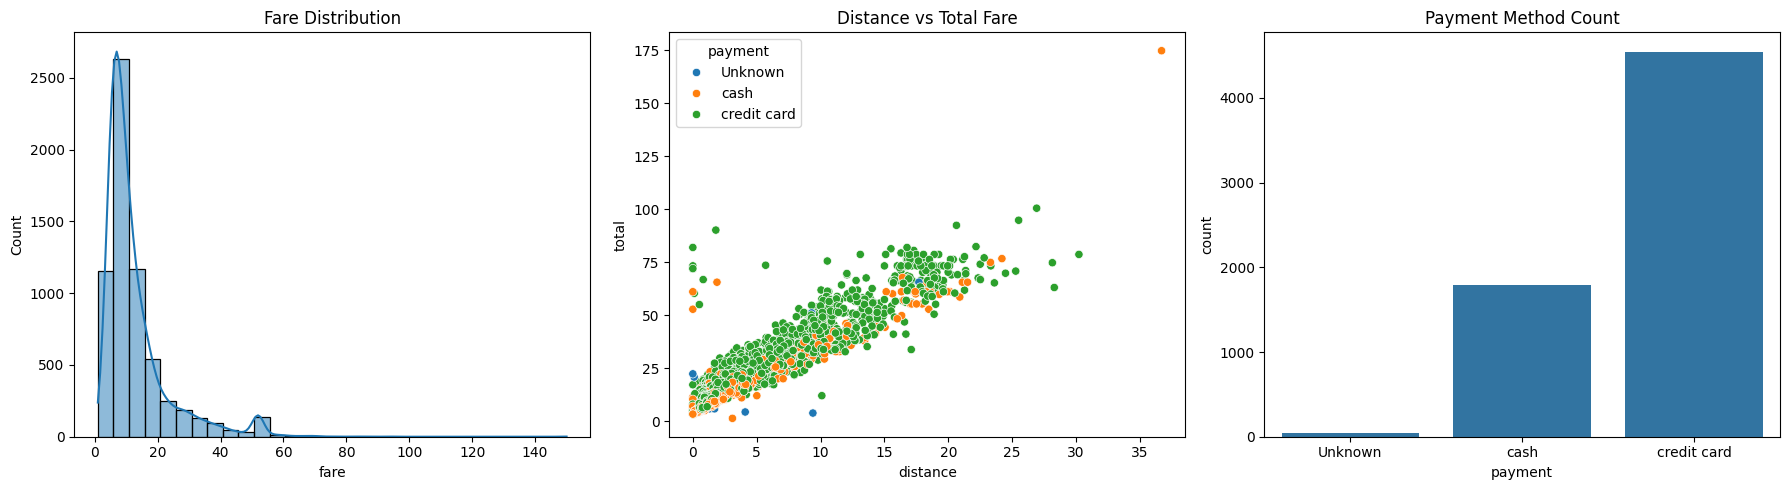

In [40]:
# Create figure and axes (1 row, 3 columns)
fig,axes = plt.subplots(1,3,figsize = (18,5)) 

# Distribution of fare
sns.histplot(df['fare'],bins = 30,kde = True, ax=axes[0])
axes[0].set_title('Fare Distribution')

# Relationship between distance and total fare
sns.scatterplot( x = 'distance' , y = 'total' ,hue =  'payment' ,data = df,ax=axes[1])
axes[1].set_title('Distance vs Total Fare')

# Count of payment methods
sns.countplot(x = 'payment', data = df,ax=axes[2])
axes[2].set_title('Payment Method Count')

# Adjust layout
plt.tight_layout()
plt.show()

## Prepare Data for Modeling

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Features (drop non-relevant columns)
x = df.drop(['pickup','dropoff','payment'],axis = 1)

# Encode categorical variables
x = pd.get_dummies(x,drop_first  = True)

# Target variable
y = df['payment']

le = LabelEncoder()
y = le.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Train 3 Models

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score


# Initialize models
log_reg = LogisticRegression(max_iter=1000)
dtree = DecisionTreeClassifier(random_state=42, class_weight='balanced')
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train models
log_reg.fit(x_train, y_train)
dtree.fit(x_train, y_train)
rf.fit(x_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [88]:
precision_score(y_test, y_pred, average='weighted', zero_division=0)

0.9409746772550328

In [89]:
df['payment'].value_counts()

payment
credit card    4546
cash           1795
Unknown          42
Name: count, dtype: int64

##  Evaluate Models

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dtree,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(x_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted',zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted',zero_division=0 ))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted',zero_division=0))


Logistic Regression
Accuracy: 0.9052466718872357
Precision: 0.9367516801126473
Recall: 0.9052466718872357
F1 Score: 0.9191069729060278

Decision Tree
Accuracy: 0.9209083790133125
Precision: 0.9275284036206969
Recall: 0.9209083790133125
F1 Score: 0.9237871191536589

Random Forest
Accuracy: 0.9436178543461238
Precision: 0.9409746772550328
Recall: 0.9436178543461238
F1 Score: 0.9409711111270349
